
# Hinton diagrams

Hinton diagrams are useful for visualizing the values of a 2D array (e.g.
a weight matrix): Positive and negative values are represented by white and
black squares, respectively, and the size of each square represents the
magnitude of each value.

Initial idea from David Warde-Farley on the SciPy Cookbook


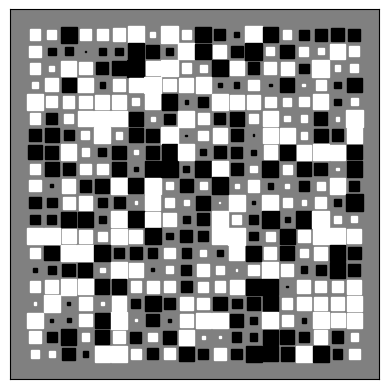

In [1]:
import matplotlib.pyplot as plt
import numpy as np


def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2 ** np.ceil(np.log2(np.abs(matrix).max()))

    ax.patch.set_facecolor('gray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'white' if w > 0 else 'black'
        size = np.sqrt(abs(w) / max_weight)
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()


if __name__ == '__main__':
    # Fixing random state for reproducibility
    np.random.seed(19680801)

    hinton(np.random.rand(20, 20) - 0.5)
    plt.show()